### Setup

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Set random seed for reproducibility
np.random.seed(42)

# Configure matplotlib for better display
plt.rcParams['figure.figsize'] = [8, 6]
plt.rcParams['font.size'] = 12

### Exercise 1: Implement a Perceptron Class


In [2]:
class Perceptron:
    """
    A simple Rosenblatt Perceptron implementation.
    """

    def __init__(self, n_inputs, learning_rate=0.1):
        """
        Initialise the perceptron.

        Parameters:
        -----------
        n_inputs : int
            Number of input features
        learning_rate : float
            Learning rate (alpha) for weight updates
        """
        
        self.weights = np.random.uniform(-0.5, 0.5, size=n_inputs)
        self.bias = np.random.uniform(-0.5, 0.5)
        self.learning_rate = learning_rate

    def step_function(self, x):
        """
        Step activation function.

        Returns 1 if x >= 0, else 0.
        """
        
        return int(x >= 0)

    def predict(self, inputs):
        """
        Compute the perceptron output for given inputs.

        Parameters:
        -----------
        inputs : array-like
            Input values (x1, x2, ...)

        Returns:
        --------
        int : 0 or 1
        """
        
        weighted_sum = np.dot(inputs, self.weights) + self.bias
        return self.step_function(weighted_sum)

    def train(self, X, y, epochs, verbose=True):
        """
        Train the perceptron using the perceptron learning rule.

        Parameters:
        -----------
        X : array-like, shape (n_samples, n_features)
            Training inputs
        y : array-like, shape (n_samples,)
            Target outputs (0 or 1)
        epochs : int
            Number of training epochs
        verbose : bool
            If True, print weights after each epoch

        Returns:
        --------
        list : History of (weights, bias) tuples for each epoch
        """
        history = []

        # Store initial weights
        history.append((self.weights.copy(), self.bias))

        for epoch in range(epochs):
            total_error = 0

            for i in range(len(X)):
                # Get prediction
                prediction = self.predict(X[i])

                # Calculate error
                error = y[i] - prediction
                total_error += abs(error)

                # Update weights and bias
                self.weights += self.learning_rate * error * X[i]
                self.bias += self.learning_rate * error

            # Store weights after this epoch
            history.append((self.weights.copy(), self.bias))

            if verbose:
                print(
                    f"Epoch {epoch + 1}: weights = {self.weights}, bias = {self.bias:.4f}, errors = {total_error}")

            # Early stopping if no errors
            if total_error == 0:
                if verbose:
                    print(f"Converged after {epoch + 1} epochs!")
                break

        return history


### Exercise 2: Train the Perceptron for Logical AND

#### Task 2.1: Define the Training Data


In [3]:
# Define training data for AND
X_and = np.array([
    [0, 0],
    [0, 1],
    [1, 0],
    [1, 1]
])

y_and = np.array([0, 0, 0, 1])

print("AND Training Data:")
print("X:")
print(X_and)
print("y:", y_and)

AND Training Data:
X:
[[0 0]
 [0 1]
 [1 0]
 [1 1]]
y: [0 0 0 1]


#### Task 2.2: Train and Test the Perceptron

In [4]:
# Create perceptron
perceptron_and = Perceptron(n_inputs=2, learning_rate=0.1)
print("Initial weights:", perceptron_and.weights)
print("Initial bias:", perceptron_and.bias)
print("\nTraining...\n")

# Train (store the history for later visualisation)
history_and = perceptron_and.train(X_and, y_and, epochs=10)

# Test on all inputs
print("\nTesting AND perceptron:")
print("-" * 40)
all_correct = True
for i in range(len(X_and)):
    prediction = perceptron_and.predict(X_and[i])
    correct = "✓" if prediction == y_and[i] else "✗"
    if prediction != y_and[i]:
        all_correct = False
    print(f"Input: {X_and[i]} -> Predicted: {prediction}, Expected: {y_and[i]} {correct}")
print("-" * 40)
print(f"All predictions correct: {all_correct}")


Initial weights: [-0.12545988  0.45071431]
Initial bias: 0.2319939418114051

Training...

Epoch 1: weights = [-0.12545988  0.35071431], bias = 0.0320, errors = 2
Epoch 2: weights = [-0.02545988  0.35071431], bias = -0.0680, errors = 3
Epoch 3: weights = [-0.02545988  0.25071431], bias = -0.1680, errors = 1
Epoch 4: weights = [0.07454012 0.25071431], bias = -0.1680, errors = 2
Epoch 5: weights = [0.17454012 0.25071431], bias = -0.1680, errors = 2
Epoch 6: weights = [0.17454012 0.15071431], bias = -0.2680, errors = 1
Epoch 7: weights = [0.17454012 0.15071431], bias = -0.2680, errors = 0
Converged after 7 epochs!

Testing AND perceptron:
----------------------------------------
Input: [0 0] -> Predicted: 0, Expected: 0 ✓
Input: [0 1] -> Predicted: 0, Expected: 0 ✓
Input: [1 0] -> Predicted: 0, Expected: 0 ✓
Input: [1 1] -> Predicted: 1, Expected: 1 ✓
----------------------------------------
All predictions correct: True


#### Task 2.3: Visualise the Decision Boundary

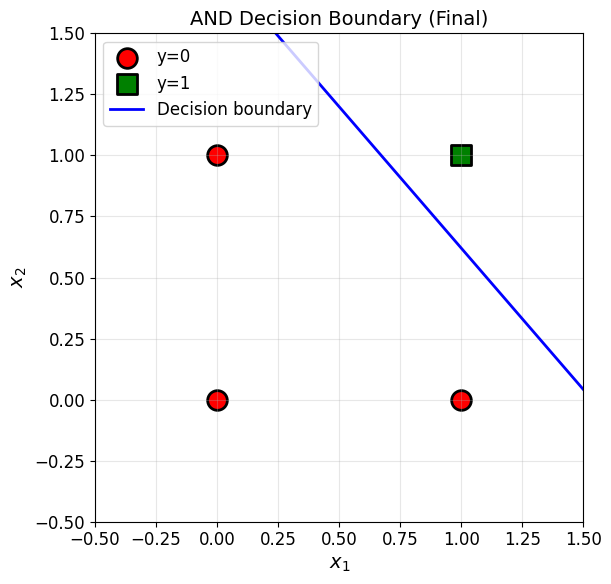

In [5]:
# Plotting function
def plot_decision_boundary(X, y, weights, bias, title="Decision Boundary", ax=None):
    """
    Plot data points and decision boundary.
    
    Parameters:
    -----------
    X : array-like, shape (n_samples, 2)
        Input data points
    y : array-like, shape (n_samples,)
        Labels (0 or 1)
    weights : array-like, shape (2,)
        Perceptron weights [w1, w2]
    bias : float
        Perceptron bias
    title : str
        Plot title
    ax : matplotlib axis (optional)
        Axis to plot on. If None, creates new figure.
    """
    if ax is None:
        fig, ax = plt.subplots(figsize=(8, 6))
    
    # Plot points
    for i in range(len(X)):
        if y[i] == 0:
            ax.scatter(X[i, 0], X[i, 1], c='red', marker='o', s=200,
                       edgecolors='black', linewidths=2, label='y=0' if i == 0 else '')
        else:
            ax.scatter(X[i, 0], X[i, 1], c='green', marker='s', s=200,
                       edgecolors='black', linewidths=2, label='y=1' if i == 3 else '')
    
    # Plot decision boundary
    # Line: w1*x1 + w2*x2 + b = 0
    # => x2 = -(w1/w2)*x1 - b/w2
    
    x1_range = np.linspace(-0.5, 1.5, 100)
    
    if abs(weights[1]) > 1e-10:  # Avoid division by zero
        x2_boundary = -(weights[0] / weights[1]) * x1_range - (bias / weights[1])
        ax.plot(x1_range, x2_boundary, 'b-', linewidth=2, label='Decision boundary')
    else:
        # Vertical line case
        if abs(weights[0]) > 1e-10:
            x1_boundary = -bias / weights[0]
            ax.axvline(x=x1_boundary, color='b', linewidth=2, label='Decision boundary')
    
    # Formatting
    ax.set_xlim(-0.5, 1.5)
    ax.set_ylim(-0.5, 1.5)
    ax.set_xlabel('$x_1$', fontsize=14)
    ax.set_ylabel('$x_2$', fontsize=14)
    ax.set_title(title, fontsize=14)
    ax.grid(True, alpha=0.3)
    ax.legend(loc='upper left')
    ax.set_aspect('equal')
    
    return ax

# Test the plotting function with the trained AND perceptron
plot_decision_boundary(X_and, y_and, perceptron_and.weights, perceptron_and.bias,
                       "AND Decision Boundary (Final)")
plt.tight_layout()
plt.show()

#### Task 2.4: Animate the Learning Process

AND - Decision Boundary Evolution:


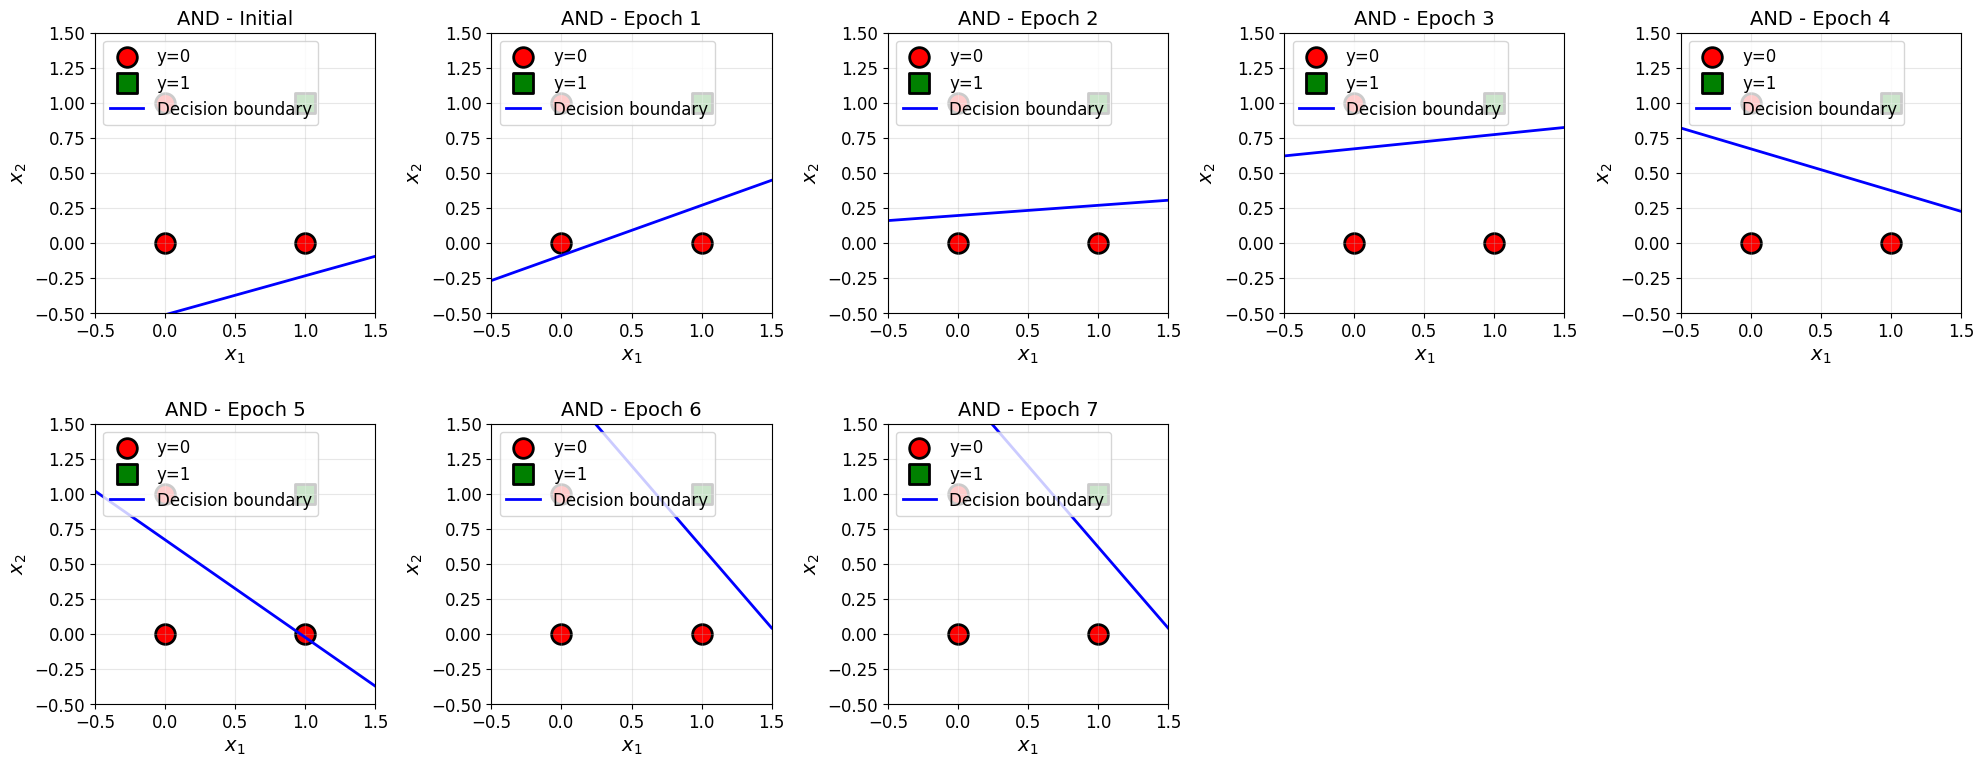

In [6]:
# Visualise decision boundary evolution across epochs
def plot_training_evolution(X, y, history, title_prefix=""):
    """
    Plot decision boundary evolution across training epochs.
    """
    n_epochs = len(history)
    
    # Determine grid size
    n_cols = min(5, n_epochs)
    n_rows = (n_epochs + n_cols - 1) // n_cols
    
    fig, axes = plt.subplots(n_rows, n_cols, figsize=(4 * n_cols, 4 * n_rows))
    
    # Handle single row case
    if n_rows == 1:
        axes = axes.reshape(1, -1)
    
    for idx, (weights, bias) in enumerate(history):
        row = idx // n_cols
        col = idx % n_cols
        ax = axes[row, col]
        
        epoch_label = "Initial" if idx == 0 else f"Epoch {idx}"
        plot_decision_boundary(X, y, weights, bias,
                               f"{title_prefix}{epoch_label}", ax=ax)
    
    # Hide empty subplots
    for idx in range(n_epochs, n_rows * n_cols):
        row = idx // n_cols
        col = idx % n_cols
        axes[row, col].axis('off')
    
    plt.tight_layout()
    plt.show()

# Plot AND training evolution
print("AND - Decision Boundary Evolution:")
plot_training_evolution(X_and, y_and, history_and, "AND - ")


#### Task 2.5: Display Weight Updates Table

In [7]:
import pandas as pd

def create_weight_table(history):
    """
    Create a pandas DataFrame showing weights at each epoch.
    """
    data = {
        'Epoch': [],
        'w₁': [],
        'w₂': [],
        'bias': []
    }
    
    for epoch, (weights, bias) in enumerate(history):
        data['Epoch'].append('Initial' if epoch == 0 else epoch)
        data['w₁'].append(f"{weights[0]:.4f}")
        data['w₂'].append(f"{weights[1]:.4f}")
        data['bias'].append(f"{bias:.4f}")
    
    return pd.DataFrame(data)

print("AND - Weight History Table:")
df_and = create_weight_table(history_and)
display(df_and)


AND - Weight History Table:


,Epoch,w₁,w₂,bias
0,Initial,-0.1255,0.4507,0.2320
1,1,-0.1255,0.3507,0.0320
2,2,-0.0255,0.3507,-0.0680
3,3,-0.0255,0.2507,-0.1680
4,4,0.0745,0.2507,-0.1680
5,5,0.1745,0.2507,-0.1680
6,6,0.1745,0.1507,-0.2680
7,7,0.1745,0.1507,-0.2680


### Exercise 3: Train the Perceptron

#### Task 3.1: Define Data, Train, and Visualise

In [8]:
# Define training data for OR
X_or = np.array([
    [0, 0],
    [0, 1],
    [1, 0],
    [1, 1]
])

y_or = np.array([0, 1, 1, 1])

print("OR Training Data:")
print("X:")
print(X_or)
print("y:", y_or)

OR Training Data:
X:
[[0 0]
 [0 1]
 [1 0]
 [1 1]]
y: [0 1 1 1]


In [9]:
# Create perceptron
perceptron_or = Perceptron(n_inputs=2, learning_rate=0.1)
print("Initial weights:", perceptron_or.weights)
print("Initial bias:", perceptron_or.bias)
print("\nTraining...\n")

# Train (store the history for later visualisation)
history_or = perceptron_or.train(X_or, y_or, epochs=10)

# Test on all inputs
print("\nTesting OR perceptron:")
print("-" * 40)
all_correct = True
for i in range(len(X_or)):
    prediction = perceptron_or.predict(X_or[i])
    correct = "✓" if prediction == y_or[i] else "✗"
    if prediction != y_or[i]:
        all_correct = False
    print(f"Input: {X_or[i]} -> Predicted: {prediction}, Expected: {y_or[i]} {correct}")
print("-" * 40)
print(f"All predictions correct: {all_correct}")


Initial weights: [ 0.09865848 -0.34398136]
Initial bias: -0.34400547966379735

Training...

Epoch 1: weights = [ 0.29865848 -0.14398136], bias = -0.0440, errors = 3
Epoch 2: weights = [ 0.29865848 -0.04398136], bias = 0.0560, errors = 1
Epoch 3: weights = [0.29865848 0.05601864], bias = 0.0560, errors = 2
Epoch 4: weights = [0.29865848 0.05601864], bias = -0.0440, errors = 1
Epoch 5: weights = [0.29865848 0.05601864], bias = -0.0440, errors = 0
Converged after 5 epochs!

Testing OR perceptron:
----------------------------------------
Input: [0 0] -> Predicted: 0, Expected: 0 ✓
Input: [0 1] -> Predicted: 1, Expected: 1 ✓
Input: [1 0] -> Predicted: 1, Expected: 1 ✓
Input: [1 1] -> Predicted: 1, Expected: 1 ✓
----------------------------------------
All predictions correct: True


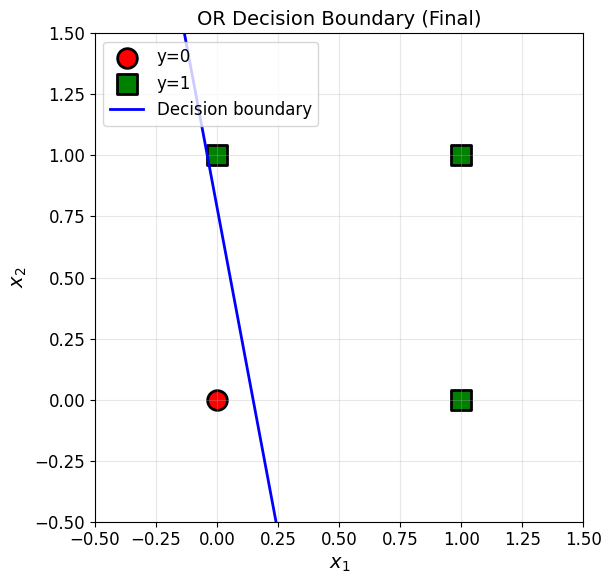


OR - Decision Boundary Evolution:


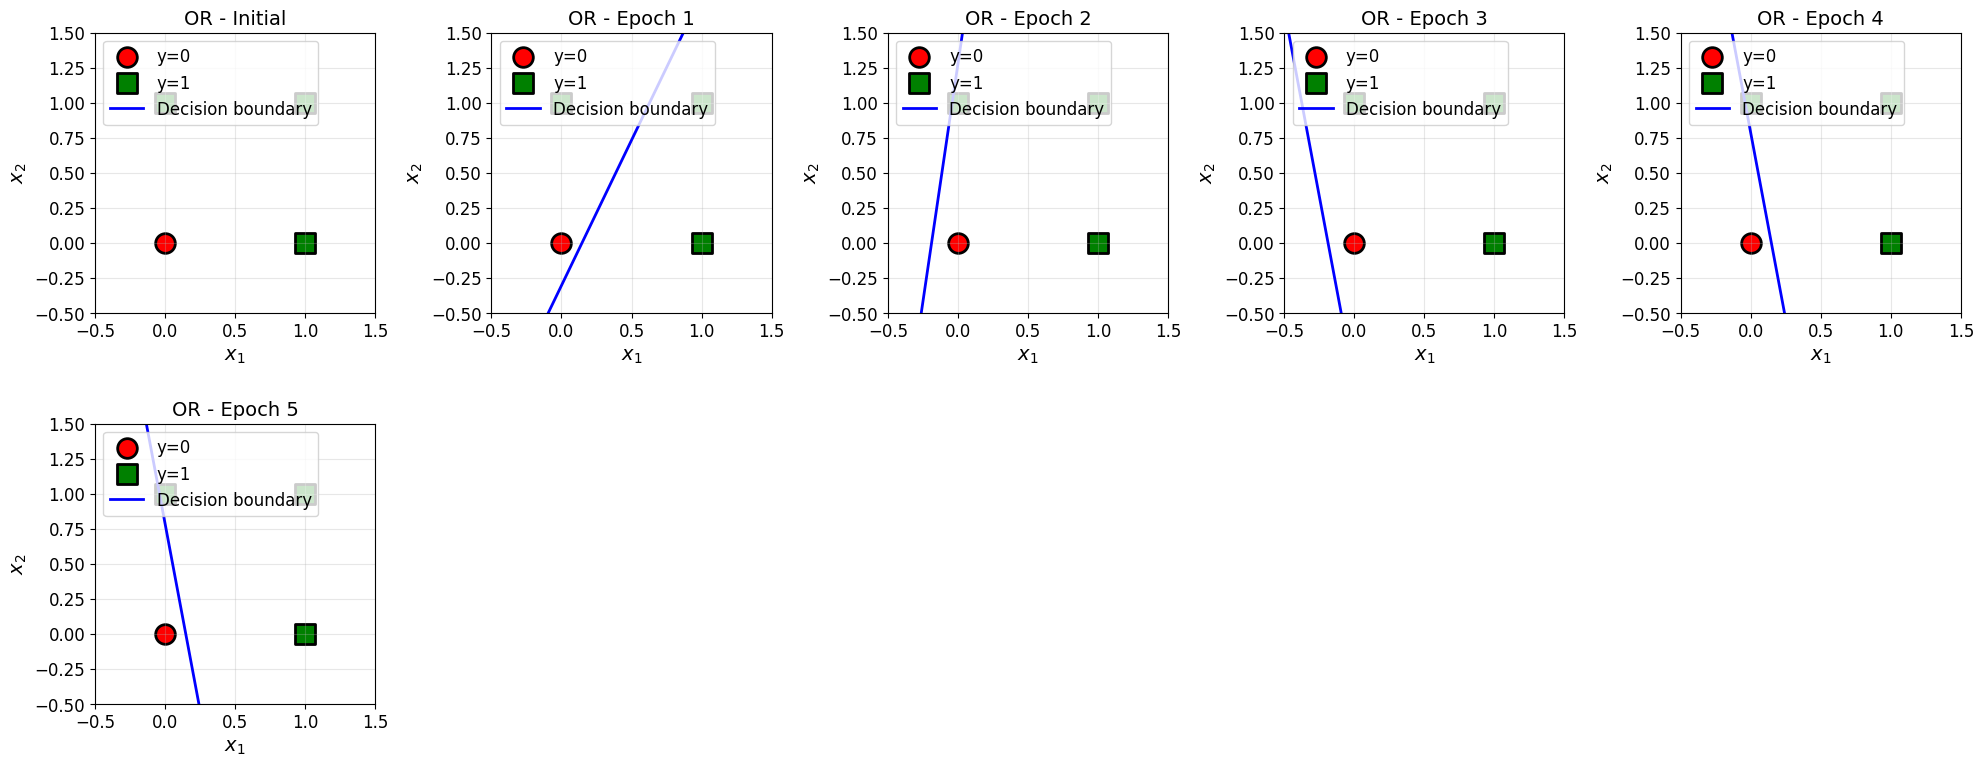


OR - Weight History Table:


,Epoch,w₁,w₂,bias
0,Initial,0.0987,-0.3440,-0.3440
1,1,0.2987,-0.1440,-0.0440
2,2,0.2987,-0.0440,0.0560
3,3,0.2987,0.0560,0.0560
4,4,0.2987,0.0560,-0.0440
5,5,0.2987,0.0560,-0.0440


In [10]:
# Plot the decision boundary
plot_decision_boundary(X_or, y_or, perceptron_or.weights, perceptron_or.bias,
                       "OR Decision Boundary (Final)")
plt.tight_layout()
plt.show()

# Plot OR training evolution
print("\nOR - Decision Boundary Evolution:")
plot_training_evolution(X_or, y_or, history_or, "OR - ")

# Draw the weight history table
print("\nOR - Weight History Table:")
df_or = create_weight_table(history_or)
display(df_or)
